In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

import sys
from pathlib import Path

# Add project paths
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root / "src"))

# Import experiment management from HDMF src folder
from simulation_runner import HDMFSimulationRunner
from experiment_manager import ExperimentManager

from utils.data_loading import load_all_sc_matrices


In [ ]:
experiment_manager = ExperimentManager(project_root, config_path="Dynamic_Stability", results_dir="/network/iss/cohen/data/Ivan/fastHDMF", job_id=1, job_count="16")

print(f"Project root: {project_root}")
print("HDMF experiment system loaded!!")

#experiment_dir,experiment_id = experiment_manager.setup_experiment(config_path="Homeostatic_Grid", job_id="1", job_count_str="4")
runner = HDMFSimulationRunner(project_root, experiment_manager)
res = runner.run_experiment()

# Integrate results

In [4]:
experiment_manager = ExperimentManager(project_root, config_path="Dynamic_Stability", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")

experiment_manager.integrate_slurm_results()

2025-09-17 15:55:48,507 - hdmf_experiment_Dynamic_Stability - INFO - Experiment 'Dynamic_Stability' initialized
2025-09-17 15:55:48,509 - hdmf_experiment_Dynamic_Stability - INFO - Config: Showing firing rate stability across G values in the dynamic model
2025-09-17 15:55:48,511 - hdmf_experiment_Dynamic_Stability - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Dynamic_Stability
2025-09-17 15:55:48,528 - hdmf_experiment_Dynamic_Stability - INFO - Integrating 16 job folders from /network/iss/cohen/data/Ivan/fastHDMF/Dynamic_Stability


INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Dynamic_Stability.yaml


2025-09-17 15:55:48,877 - hdmf_experiment_Dynamic_Stability - INFO - Integrated results saved to /network/iss/cohen/data/Ivan/fastHDMF/Dynamic_Stability/full_results.pkl


PosixPath('/network/iss/cohen/data/Ivan/fastHDMF/Dynamic_Stability')

# Load results


In [10]:
experiment_manager = ExperimentManager(project_root, config_path="Dynamic_Stability", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res = experiment_manager.load_experiment_results()

2025-09-17 16:15:42,861 - hdmf_experiment_Dynamic_Stability - INFO - Experiment 'Dynamic_Stability' initialized
2025-09-17 16:15:42,863 - hdmf_experiment_Dynamic_Stability - INFO - Config: Showing firing rate stability across G values in the dynamic model
2025-09-17 16:15:42,865 - hdmf_experiment_Dynamic_Stability - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Dynamic_Stability


2025-09-17 16:15:42,899 - hdmf_experiment_Dynamic_Stability - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Dynamic_Stability.yaml


INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Dynamic_Stability.yaml


In [11]:
res['full_results']['observables']['mean_fic'].shape


(80, 30)

# Load results

In [25]:
experiment_manager = ExperimentManager(project_root, results_dir="/network/iss/cohen/data/Ivan/fastHDMF/")
res = experiment_manager.load_experiment_results("Homeostatic_Grid",is_done=False)

AttributeError: 'NoneType' object has no attribute 'endswith'

Text(0.5, 1.0, 'Max correlation time (ms) for rate model')

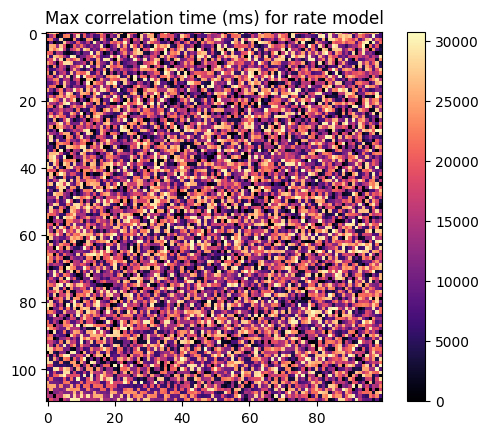

In [20]:
import matplotlib.pyplot as plt

max_corr_time = np.stack(res['full_results']['observables']['fic_max_corr_time_rates'].flatten())
max_corr_time = np.reshape(max_corr_time, (100,110,32))
max_corr_time = np.swapaxes(max_corr_time, 0, 1)
plt.imshow(max_corr_time[:,:,30], cmap='magma')
plt.colorbar()
plt.title("Max correlation time (ms) for rate model")

In [12]:
np.stack(res['full_results']['observables']['fic_max_corr_time_rates'].flatten()).shape

(352000,)

In [6]:
hom_grid = np.reshape(hom_grid, (100,110,32))
hom_grid = np.swapaxes(hom_grid, 0, 1)

NameError: name 'hom_grid' is not defined

In [33]:
# average the object array
stacked = np.stack(hom_grid.flatten())
new_tensor = stacked.reshape(hom_grid.shape + (stacked.shape[-1],))
hom_grid_flatened = new_tensor.mean(axis=3)
hom_grid_flatened = 3.44 - hom_grid_flatened  # inverting the rates to match the excitability values

In [34]:
np.save("mean_rates_hom_grid.npy", hom_grid_flatened,allow_pickle=True)

In [10]:
hom_grid_flatened = np.load("mean_rates_hom_grid.npy")

## Plot

In [42]:
from src.plotting import HDMFResultsPlotter
plotter = HDMFResultsPlotter(config=experiment_manager.current_config)

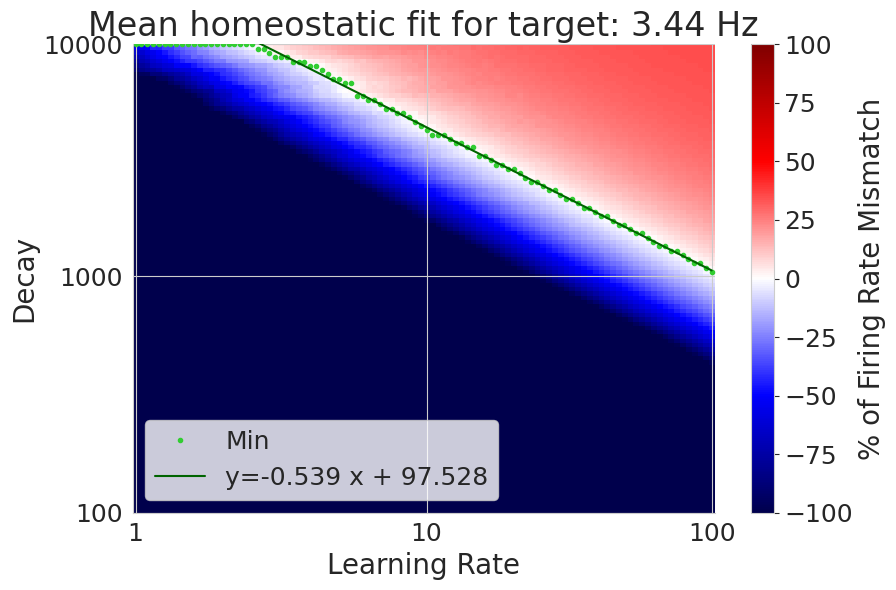

In [43]:
plotter.plot_homeostatic_fit(hom_grid_flatened, show_plot=False)